In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of ad slots (arms)
n_slots = 4
slot_names = ["Top Banner", "Sidebar", "Footer", "Pop-up"]

True CTRs (hidden from algorithm): {'Top Banner': 0.05, 'Sidebar': 0.1, 'Footer': 0.03, 'Pop-up': 0.07}

Final Estimated CTRs:
Top Banner: 0.055 (chosen 217 times)
Sidebar: 0.096 (chosen 699 times)
Footer: 0.055 (chosen 55 times)
Pop-up: 0.034 (chosen 29 times)

Total Clicks after 1000 impressions: 83


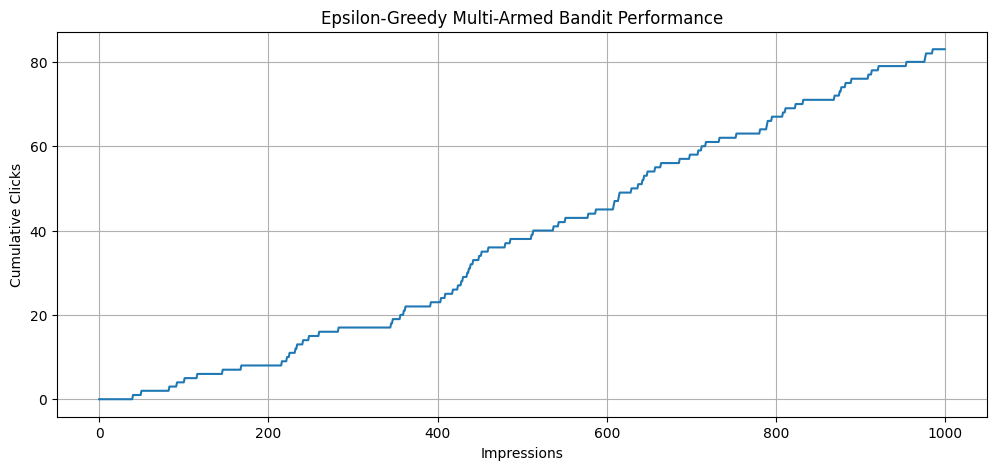

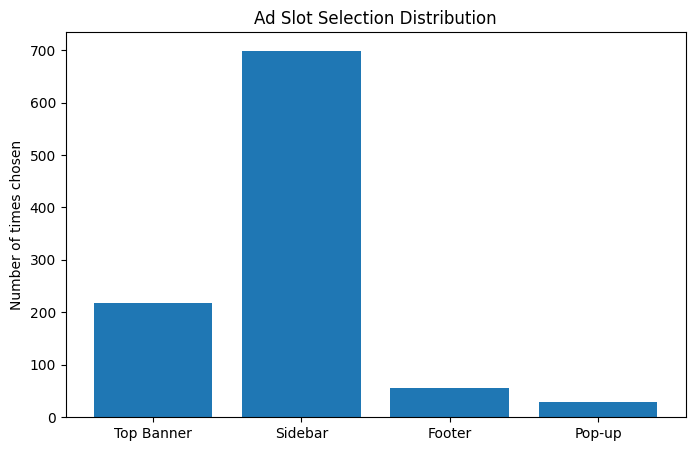

In [4]:
# True Click-Through Rates (CTR) for simulation (hidden from the algorithm)
true_ctrs = [0.05, 0.10, 0.03, 0.07]  # Example probabilities of click
print("True CTRs (hidden from algorithm):", dict(zip(slot_names, true_ctrs)))

# Initialize estimates and counts
estimated_ctrs = np.zeros(n_slots)   # Estimated CTRs
slot_counts = np.zeros(n_slots)      # Number of times each slot was chosen

# Parameters
epsilon = 0.1        # Exploration probability (10%)
n_impressions = 1000 # Total ad impressions
total_rewards = 0    # Total clicks

# To track performance
rewards_per_step = []
chosen_slots = []

# Simulation
for i in range(n_impressions):
    # Step 1: Choose slot (explore vs exploit)
    if np.random.rand() < epsilon:
        slot = np.random.randint(n_slots)  # Explore random slot
    else:
        slot = np.argmax(estimated_ctrs)   # Exploit best slot so far

    chosen_slots.append(slot)

    # Step 2: Simulate user click (reward = 1 if clicked, else 0)
    reward = np.random.rand() < true_ctrs[slot]
    reward = int(reward)

    # Step 3: Update statistics
    slot_counts[slot] += 1
    estimated_ctrs[slot] += (reward - estimated_ctrs[slot]) / slot_counts[slot]

    # Track performance
    total_rewards += reward
    rewards_per_step.append(total_rewards)

# Results
print("\nFinal Estimated CTRs:")
for i in range(n_slots):
    print(f"{slot_names[i]}: {estimated_ctrs[i]:.3f} (chosen {int(slot_counts[i])} times)")

print(f"\nTotal Clicks after {n_impressions} impressions: {total_rewards}")

# Plot cumulative rewards
plt.figure(figsize=(12, 5))
plt.plot(rewards_per_step)
plt.xlabel("Impressions")
plt.ylabel("Cumulative Clicks")
plt.title("Epsilon-Greedy Multi-Armed Bandit Performance")
plt.grid()
plt.show()

# Plot slot selection distribution
plt.figure(figsize=(8, 5))
plt.bar(slot_names, slot_counts)
plt.ylabel("Number of times chosen")
plt.title("Ad Slot Selection Distribution")
plt.show()


In [5]:
# Analysis of Results
print("Performance Analysis:")
print("-" * 50)
print("Optimal CTR (Sidebar): 0.10")

# Calculate average reward per impression
average_reward = total_rewards / n_impressions
print(f"\nActual Average Reward per Impression: {average_reward:.4f}")

# Calculate regret (difference from optimal)
optimal_reward = 0.10  # The best possible CTR
total_regret = (optimal_reward * n_impressions) - total_rewards
print(f"Total Regret: {total_regret:.2f} clicks")
print(f"Average Regret per Impression: {total_regret/n_impressions:.4f}")

# Calculate percentage of optimal choices
optimal_choices = slot_counts[1]  # Count of choosing Sidebar (index 1)
print(f"\nPercentage of Optimal Choices: {(optimal_choices/n_impressions)*100:.2f}%")

# Compare estimated vs true CTRs
print("\nEstimated vs True CTRs:")
for i in range(n_slots):
    print(f"{slot_names[i]}:")
    print(f"  True CTR: {true_ctrs[i]:.3f}")
    print(f"  Estimated CTR: {estimated_ctrs[i]:.3f}")
    print(f"  Accuracy: {100*(1 - abs(true_ctrs[i] - estimated_ctrs[i])/true_ctrs[i]):.2f}%")

Performance Analysis:
--------------------------------------------------
Optimal CTR (Sidebar): 0.10

Actual Average Reward per Impression: 0.0830
Total Regret: 17.00 clicks
Average Regret per Impression: 0.0170

Percentage of Optimal Choices: 69.90%

Estimated vs True CTRs:
Top Banner:
  True CTR: 0.050
  Estimated CTR: 0.055
  Accuracy: 89.40%
Sidebar:
  True CTR: 0.100
  Estimated CTR: 0.096
  Accuracy: 95.85%
Footer:
  True CTR: 0.030
  Estimated CTR: 0.055
  Accuracy: 18.18%
Pop-up:
  True CTR: 0.070
  Estimated CTR: 0.034
  Accuracy: 49.26%
